In [1]:
import pandas as pd
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
full_stats = pickle.load(open('dataframe.pkl', 'rb'))

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
full_stats=full_stats.drop(columns = ['consec_away'])

In [5]:
full_stats

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,batting_RBI_10d_std,batting_BB_10d_Avg,...,pitchers_IP_45d_std,pitchers_H_45d_Avg,pitchers_H_45d_std,pitchers_R_45d_Avg,pitchers_R_45d_std,pitchers_ER_45d_Avg,pitchers_ER_45d_std,pitchers_BB_45d_Avg,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std,name_x,name_y,rest_diff_home-away
0,OAK201203280,SEA,OAK,2012-03-28,Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mccarbr01,hernafe02,NaN
1,OAK201203290,SEA,OAK,2012-03-29,Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1,Thursday,1,0.000000,NaN,-2.0,NaN,-3.000000,NaN,-2.000000,NaN,0.000000,NaN,6.00,NaN,1.000000,NaN,-0.07700,NaN,-0.036000,NaN,-0.102000,NaN,-0.138000,NaN,7.000000,NaN,-2.000000,NaN,-0.50000,NaN,0.160000,NaN,0.000000,NaN,-2.000000,NaN,-3.000000,NaN,-2.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,colonba01,vargaja01,NaN
2,MIA201204040,STL,MIA,2012-04-04,Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,johnsjo09,lohseky01,NaN
3,CLE201204050,TOR,CLE,2012-04-05,Start Time: 3:08 p.m. Local,masteju01,romerri01,4,7,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
numerics = []
for col in full_stats.columns:
    if full_stats[col].dtype == 'float64':
        numerics.append(col)

In [7]:
numerics

['batting_AB_5d_Avg',
 'batting_AB_5d_std',
 'batting_R_5d_Avg',
 'batting_R_5d_std',
 'batting_H_5d_Avg',
 'batting_H_5d_std',
 'batting_RBI_5d_Avg',
 'batting_RBI_5d_std',
 'batting_BB_5d_Avg',
 'batting_BB_5d_std',
 'batting_SO_5d_Avg',
 'batting_SO_5d_std',
 'batting_PA_5d_Avg',
 'batting_PA_5d_std',
 'batting_batting_avg_5d_Avg',
 'batting_batting_avg_5d_std',
 'batting_onbase_perc_5d_Avg',
 'batting_onbase_perc_5d_std',
 'batting_slugging_perc_5d_Avg',
 'batting_slugging_perc_5d_std',
 'batting_onbase_plus_slugging_5d_Avg',
 'batting_onbase_plus_slugging_5d_std',
 'batting_pitches_5d_Avg',
 'batting_pitches_5d_std',
 'batting_strikes_total_5d_Avg',
 'batting_strikes_total_5d_std',
 'batting_wpa_bat_5d_Avg',
 'batting_wpa_bat_5d_std',
 'batting_leverage_index_avg_5d_Avg',
 'batting_leverage_index_avg_5d_std',
 'batting_AB_10d_Avg',
 'batting_AB_10d_std',
 'batting_R_10d_Avg',
 'batting_R_10d_std',
 'batting_H_10d_Avg',
 'batting_H_10d_std',
 'batting_RBI_10d_Avg',
 'batting_RBI_10

In [8]:
full_stats_model = full_stats.dropna()

In [9]:
X = full_stats_model[numerics]
y = full_stats_model['Home_win']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
logreg = LogisticRegression()

In [11]:
logreg.fit(X_train, y_train)

C:\Users\jacob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = logreg.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report

In [14]:
accuracy_score(y_test, y_pred)

0.5336069779374037

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.32      0.39      1776
           1       0.56      0.71      0.62      2122

    accuracy                           0.53      3898
   macro avg       0.52      0.52      0.50      3898
weighted avg       0.52      0.53      0.52      3898



In [16]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [17]:
hist_class = HistGradientBoostingClassifier(max_iter = 1000)

In [18]:
hist_class.fit(X_train, y_train)

HistGradientBoostingClassifier(max_iter=1000)

In [19]:
y_pred2 = hist_class.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred2)

0.547203694202155

In [21]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.51      0.27      0.35      1776
           1       0.56      0.78      0.65      2122

    accuracy                           0.55      3898
   macro avg       0.53      0.52      0.50      3898
weighted avg       0.54      0.55      0.52      3898



In [22]:
from sklearn.metrics import plot_confusion_matrix

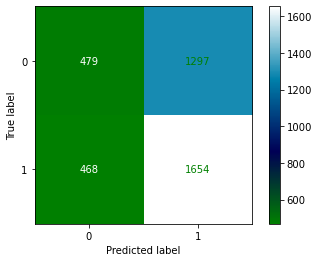

In [23]:
plot_confusion_matrix(hist_class, X_test, y_test,cmap = 'ocean')

In [24]:
#The model is struggling with away wins. This could be because theyre less common:

In [25]:
full_stats_model.value_counts('Home_win')

Home_win
1    10526
0     8961
dtype: int64

# More feature engineering

In [26]:
full_stats_model['away_losses'] = pd.DataFrame(full_stats_model.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'away_abbr'])['Home_win'].cumsum())

<ipython-input-26-11ae042cce84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_stats_model['away_losses'] = pd.DataFrame(full_stats_model.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'away_abbr'])['Home_win'].cumsum())


In [27]:
full_stats_model['home_wins'] = pd.DataFrame(full_stats_model.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'home_abbr'])['Home_win'].cumsum())

<ipython-input-27-90282f21e5dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_stats_model['home_wins'] = pd.DataFrame(full_stats_model.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'home_abbr'])['Home_win'].cumsum())


In [28]:
full_stats_model['num_games'] = 1

<ipython-input-28-0521c8a96091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_stats_model['num_games'] = 1


In [29]:
full_stats_model['total_home_games'] = pd.DataFrame(full_stats_model.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'home_abbr'])['num_games'].cumsum())

<ipython-input-29-f0243be59644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_stats_model['total_home_games'] = pd.DataFrame(full_stats_model.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'home_abbr'])['num_games'].cumsum())


In [30]:
full_stats_model['total_away_games'] = pd.DataFrame(full_stats_model.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'away_abbr'])['num_games'].cumsum())

<ipython-input-30-8e8fdf8ab058>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_stats_model['total_away_games'] = pd.DataFrame(full_stats_model.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'away_abbr'])['num_games'].cumsum())


In [31]:
full_stats_model['away_win_pct'] = (1 - (full_stats_model['away_losses']/ full_stats_model['total_away_games']))
full_stats_model['home_win_pct'] = (full_stats_model['home_wins']/full_stats_model['total_home_games'])

<ipython-input-31-2401a9e40286>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_stats_model['away_win_pct'] = (1 - (full_stats_model['away_losses']/ full_stats_model['total_away_games']))
<ipython-input-31-2401a9e40286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_stats_model['home_win_pct'] = (full_stats_model['home_wins']/full_stats_model['total_home_games'])


In [32]:
full_stats_model['win_pct_diff'] = full_stats_model['home_win_pct'] - full_stats_model['away_win_pct']

<ipython-input-32-18270620170e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_stats_model['win_pct_diff'] = full_stats_model['home_win_pct'] - full_stats_model['away_win_pct']


In [33]:
numerics = numerics + ['win_pct_diff']

In [34]:
numerics

['batting_AB_5d_Avg',
 'batting_AB_5d_std',
 'batting_R_5d_Avg',
 'batting_R_5d_std',
 'batting_H_5d_Avg',
 'batting_H_5d_std',
 'batting_RBI_5d_Avg',
 'batting_RBI_5d_std',
 'batting_BB_5d_Avg',
 'batting_BB_5d_std',
 'batting_SO_5d_Avg',
 'batting_SO_5d_std',
 'batting_PA_5d_Avg',
 'batting_PA_5d_std',
 'batting_batting_avg_5d_Avg',
 'batting_batting_avg_5d_std',
 'batting_onbase_perc_5d_Avg',
 'batting_onbase_perc_5d_std',
 'batting_slugging_perc_5d_Avg',
 'batting_slugging_perc_5d_std',
 'batting_onbase_plus_slugging_5d_Avg',
 'batting_onbase_plus_slugging_5d_std',
 'batting_pitches_5d_Avg',
 'batting_pitches_5d_std',
 'batting_strikes_total_5d_Avg',
 'batting_strikes_total_5d_std',
 'batting_wpa_bat_5d_Avg',
 'batting_wpa_bat_5d_std',
 'batting_leverage_index_avg_5d_Avg',
 'batting_leverage_index_avg_5d_std',
 'batting_AB_10d_Avg',
 'batting_AB_10d_std',
 'batting_R_10d_Avg',
 'batting_R_10d_std',
 'batting_H_10d_Avg',
 'batting_H_10d_std',
 'batting_RBI_10d_Avg',
 'batting_RBI_10

In [35]:
X = full_stats_model[numerics]
y = full_stats_model['Home_win']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [36]:
hist_class1 = HistGradientBoostingClassifier(max_iter = 1000)

In [37]:
hist_class1.fit(X_train, y_train)

HistGradientBoostingClassifier(max_iter=1000)

In [38]:
preds = hist_class1.predict(X_test)

In [39]:
accuracy_score(y_test, preds)

0.6390456644433042

In [40]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.65      0.50      0.56      1833
           1       0.63      0.77      0.69      2065

    accuracy                           0.64      3898
   macro avg       0.64      0.63      0.63      3898
weighted avg       0.64      0.64      0.63      3898



In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score(hist_class1, X_train, y_train, cv = 5)

array([0.64368185, 0.64079538, 0.64560616, 0.64015394, 0.62592236])

In [43]:
full_stats

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,batting_RBI_10d_std,batting_BB_10d_Avg,...,pitchers_IP_45d_std,pitchers_H_45d_Avg,pitchers_H_45d_std,pitchers_R_45d_Avg,pitchers_R_45d_std,pitchers_ER_45d_Avg,pitchers_ER_45d_std,pitchers_BB_45d_Avg,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std,name_x,name_y,rest_diff_home-away
0,OAK201203280,SEA,OAK,2012-03-28,Start Time: 7:09 p.m. Local,mccarbr01,hernafe02,1,3,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mccarbr01,hernafe02,NaN
1,OAK201203290,SEA,OAK,2012-03-29,Start Time: 6:04 p.m. Local,colonba01,vargaja01,4,1,Thursday,1,0.000000,NaN,-2.0,NaN,-3.000000,NaN,-2.000000,NaN,0.000000,NaN,6.00,NaN,1.000000,NaN,-0.07700,NaN,-0.036000,NaN,-0.102000,NaN,-0.138000,NaN,7.000000,NaN,-2.000000,NaN,-0.50000,NaN,0.160000,NaN,0.000000,NaN,-2.000000,NaN,-3.000000,NaN,-2.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,colonba01,vargaja01,NaN
2,MIA201204040,STL,MIA,2012-04-04,Start Time: 7:15 p.m. Local,johnsjo09,lohseky01,1,4,Wednesday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,johnsjo09,lohseky01,NaN
3,CLE201204050,TOR,CLE,2012-04-05,Start Time: 3:08 p.m. Local,masteju01,romerri01,4,7,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [56]:
odds = pd.read_csv('data/odds.csv')

In [57]:
odds['date']=pd.to_datetime(odds['date'])

In [58]:
odds[['home_abbr', 'away_abbr', 'date', 'home_ml']]

,home_abbr,away_abbr,date,home_ml
0,OAK,SEA,2012-03-28,103.0
1,OAK,SEA,2012-03-29,-110.0
2,MIA,STL,2012-04-04,-173.0
3,NYM,ATL,2012-04-05,-105.0
4,PIT,PHI,2012-04-05,176.0
...,...,...,...,...
24637,HOU,ATL,2021-10-27,-115.0
24638,ATL,HOU,2021-10-29,-115.0
24639,ATL,HOU,2021-10-30,-115.0
24640,ATL,HOU,2021-10-31,-105.0


In [59]:
pd.merge(full_stats, odds[['home_abbr', 'away_abbr', 'date', 'home_ml']], on=['away_abbr','date'], how = 'left').dropna()

,game_id,away_abbr,home_abbr_x,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,batting_RBI_10d_std,batting_BB_10d_Avg,...,pitchers_H_45d_std,pitchers_R_45d_Avg,pitchers_R_45d_std,pitchers_ER_45d_Avg,pitchers_ER_45d_std,pitchers_BB_45d_Avg,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std,name_x,name_y,rest_diff_home-away,home_abbr_y,home_ml
14,OAK201204060,SEA,OAK,2012-04-06,Start Time: 7:09 p.m. Local,mccarbr01,vargaja01,3,7,Friday,0,0.000000,0.000000,0.500000,0.707107,0.500000,-3.535534,0.500000,0.707107,0.500000,0.707107,2.00,1.414214,1.000000,0.000000,0.028000,-0.036770,0.058000,-0.011314,0.132500,0.143543,0.190500,0.132229,16.500000,-13.435029,5.000000,-9.899495,0.000000,0.630739,0.065000,0.134350,0.000000,0.000000,0.500000,0.707107,0.500000,-3.535534,0.500000,0.707107,0.500000,...,-2.121320,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.414214,-1.500000,-2.121320,1.000000,0.000000,0.015000,-0.205061,-0.500000,-6.363961,-0.045000,-0.332340,-0.130000,-0.367696,-0.500000,0.000000,-0.050000,-1.343503,2.500000,-2.121320,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.414214,-1.500000,-2.121320,1.000000,0.000000,0.015000,-0.205061,-0.500000,-6.363961,-0.045000,-0.332340,-0.130000,-0.367696,-0.500000,0.000000,mccarbr01,vargaja01,1.0,OAK,-137.0
75,LAN201204110,PIT,LAD,2012-04-11,Start Time: 7:10 p.m. Local,billich01,bedarer01,4,1,Wednesday,1,0.750000,1.112988,1.833333,-0.166812,0.166667,-0.568799,2.166667,-0.394547,1.333333,0.632722,-1.00,-1.831108,2.083333,1.719184,0.003417,-0.003658,0.018833,0.003216,0.051833,-0.082382,0.070333,-0.072191,1.000000,0.846930,-1.000000,1.936999,0.078500,-0.247706,-0.870833,0.196500,1.850000,0.077709,2.600000,-0.486927,1.400000,-1.439485,2.850000,-0.544036,2.150000,...,0.707107,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,3.000000,5.656854,0.000000,0.000000,-1.290000,0.000000,-6.000000,11.313708,-0.360000,0.424264,-0.200000,0.424264,0.150000,1.484924,-1.450000,3.606245,-3.500000,0.707107,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,3.000000,5.656854,0.000000,0.000000,-1.290000,0.000000,-6.000000,11.313708,-0.360000,0.424264,-0.200000,0.424264,0.150000,1.484924,billich01,bedarer01,-1.0,LAD,-160.0
80,C

In [54]:
full_stats_model

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,batting_RBI_10d_std,batting_BB_10d_Avg,...,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std,name_x,name_y,rest_diff_home-away,away_losses,home_wins,num_games,total_home_games,total_away_games,away_win_pct,home_win_pct,win_pct_diff
14,OAK201204060,SEA,OAK,2012-04-06,Start Time: 7:09 p.m. Local,mccarbr01,vargaja01,3,7,Friday,0,0.000000,0.000000,0.500000,0.707107,0.500000,-3.535534,0.500000,0.707107,0.500000,0.707107,2.00,1.414214,1.000000,0.000000,0.028000,-0.036770,0.058000,-0.011314,0.132500,0.143543,0.190500,0.132229,16.500000,-13.435029,5.000000,-9.899495,0.000000,0.630739,0.065000,0.134350,0.000000,0.000000,0.500000,0.707107,0.500000,-3.535534,0.500000,0.707107,0.500000,...,-1.414214,-1.500000,-2.121320,1.000000,0.000000,0.015000,-0.205061,-0.500000,-6.363961,-0.045000,-0.332340,-0.130000,-0.367696,-0.500000,0.000000,-0.050000,-1.343503,2.500000,-2.121320,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.414214,-1.500000,-2.121320,1.000000,0.000000,0.015000,-0.205061,-0.500000,-6.363961,-0.045000,-0.332340,-0.130000,-0.367696,-0.500000,0.000000,mccarbr01,vargaja01,1.0,0,0,1,1,1,1.000000,0.000000,-1.000000
75,LAN201204110,PIT,LAD,2012-04-11,Start Time: 7:10 p.m. Local,billich01,bedarer01,4,1,Wednesday,1,0.750000,1.112988,1.833333,-0.166812,0.166667,-0.568799,2.166667,-0.394547,1.333333,0.632722,-1.00,-1.831108,2.083333,1.719184,0.003417,-0.003658,0.018833,0.003216,0.051833,-0.082382,0.070333,-0.072191,1.000000,0.846930,-1.000000,1.936999,0.078500,-0.247706,-0.870833,0.196500,1.850000,0.077709,2.600000,-0.486927,1.400000,-1.439485,2.850000,-0.544036,2.150000,...,0.000000,3.000000,5.656854,0.000000,0.000000,-1.290000,0.000000,-6.000000,11.313708,-0.360000,0.424264,-0.200000,0.424264,0.150000,1.484924,-1.450000,3.606245,-3.500000,0.707107,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,3.000000,5.656854,0.000000,0.000000,-1.290000,0.000000,-6.000000,11.313708,-0.360000,0.424264,-0.200000,0.424264,0.150000,1.484924,billich01,bedarer01,-1.0,1,1,1,1,1,0.000000,1.000000,1.000000
80,CIN201204110,STL,CIN,2012-04-11,Start Time: 12:35 p.m. Local,cuetojo01,garcija02,4,3,Wednesday

# trying the model on 2022 games:

In [63]:
games_2022 = pickle.load(open('dataframe2022.pkl','rb'))

In [64]:
games_2022

,game_id,away_abbr,home_abbr,date,time,home_pitcher,away_pitcher,home_score,away_score,day,Home_win,batting_AB_5d_Avg,batting_AB_5d_std,batting_R_5d_Avg,batting_R_5d_std,batting_H_5d_Avg,batting_H_5d_std,batting_RBI_5d_Avg,batting_RBI_5d_std,batting_BB_5d_Avg,batting_BB_5d_std,batting_SO_5d_Avg,batting_SO_5d_std,batting_PA_5d_Avg,batting_PA_5d_std,batting_batting_avg_5d_Avg,batting_batting_avg_5d_std,batting_onbase_perc_5d_Avg,batting_onbase_perc_5d_std,batting_slugging_perc_5d_Avg,batting_slugging_perc_5d_std,batting_onbase_plus_slugging_5d_Avg,batting_onbase_plus_slugging_5d_std,batting_pitches_5d_Avg,batting_pitches_5d_std,batting_strikes_total_5d_Avg,batting_strikes_total_5d_std,batting_wpa_bat_5d_Avg,batting_wpa_bat_5d_std,batting_leverage_index_avg_5d_Avg,batting_leverage_index_avg_5d_std,batting_AB_10d_Avg,batting_AB_10d_std,batting_R_10d_Avg,batting_R_10d_std,batting_H_10d_Avg,batting_H_10d_std,batting_RBI_10d_Avg,batting_RBI_10d_std,batting_BB_10d_Avg,...,pitchers_IP_45d_std,pitchers_H_45d_Avg,pitchers_H_45d_std,pitchers_R_45d_Avg,pitchers_R_45d_std,pitchers_ER_45d_Avg,pitchers_ER_45d_std,pitchers_BB_45d_Avg,pitchers_BB_45d_std,pitchers_SO_45d_Avg,pitchers_SO_45d_std,pitchers_HR_45d_Avg,pitchers_HR_45d_std,pitchers_earned_run_avg_45d_Avg,pitchers_earned_run_avg_45d_std,pitchers_batters_faced_45d_Avg,pitchers_batters_faced_45d_std,pitchers_leverage_index_avg_45d_Avg,pitchers_leverage_index_avg_45d_std,pitchers_cli_avg_45d_Avg,pitchers_cli_avg_45d_std,pitchers_re24_def_45d_Avg,pitchers_re24_def_45d_std,pitchers_IP_180d_Avg,pitchers_IP_180d_std,pitchers_H_180d_Avg,pitchers_H_180d_std,pitchers_R_180d_Avg,pitchers_R_180d_std,pitchers_ER_180d_Avg,pitchers_ER_180d_std,pitchers_BB_180d_Avg,pitchers_BB_180d_std,pitchers_SO_180d_Avg,pitchers_SO_180d_std,pitchers_HR_180d_Avg,pitchers_HR_180d_std,pitchers_earned_run_avg_180d_Avg,pitchers_earned_run_avg_180d_std,pitchers_batters_faced_180d_Avg,pitchers_batters_faced_180d_std,pitchers_leverage_index_avg_180d_Avg,pitchers_leverage_index_avg_180d_std,pitchers_cli_avg_180d_Avg,pitchers_cli_avg_180d_std,pitchers_re24_def_180d_Avg,pitchers_re24_def_180d_std,name_x,name_y,rest_diff_home-away
0,ANA202204070,HOU,LAA,2022-04-07,Start Time: 6:38 p.m. Local,ohtansh01,valdefr01,1,3,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ohtansh01,valdefr01,NaN
1,ARI202204070,SDP,ARI,2022-04-07,Start Time: 6:40 p.m. Local,bumgama01,darviyu01,4,2,Thursday,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bumgama01,darviyu01,NaN
2,ATL202204070,CIN,ATL,2022-04-07,Start Time: 8:08 p.m. Local,friedma01,mahlety01,3,6,Thursday,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,friedma01,mahlety01,NaN
3,CHN202204070,MIL,CHC,2022-04-07,Start Time: 1:20 p.m. Local,hendrky01,burneco01,5,4,Thursday,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [65]:
games_2022['away_losses'] = pd.DataFrame(games_2022.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'away_abbr'])['Home_win'].cumsum())
games_2022['home_wins'] = pd.DataFrame(games_2022.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'home_abbr'])['Home_win'].cumsum())
games_2022['num_games'] = 1
games_2022['total_home_games'] = pd.DataFrame(games_2022.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'home_abbr'])['num_games'].cumsum())
games_2022['total_away_games'] = pd.DataFrame(games_2022.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'away_abbr'])['num_games'].cumsum())
games_2022['away_win_pct'] = (1 - (games_2022['away_losses']/ games_2022['total_away_games']))
games_2022['home_win_pct'] = (games_2022['home_wins']/games_2022['total_home_games'])
games_2022['win_pct_diff'] = games_2022['home_win_pct'] - games_2022['away_win_pct']

In [67]:
pred2022 = hist_class1.predict(games_2022[numerics])

In [68]:
accuracy_score(games_2022['Home_win'],pred2022)

0.6962962962962963

In [69]:
print(classification_report(games_2022['Home_win'],pred2022))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       387
           1       0.69      0.75      0.72       423

    accuracy                           0.70       810
   macro avg       0.70      0.69      0.69       810
weighted avg       0.70      0.70      0.70       810



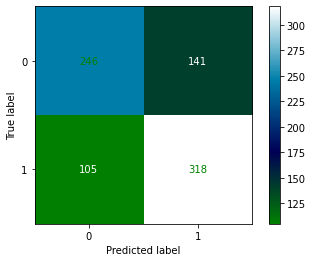

In [160]:
plot_confusion_matrix(hist_class1, games_2022[numerics], games_2022['Home_win'],cmap = 'ocean')

# Predictions for 6/7/2022

In [95]:
full_hist_class = HistGradientBoostingClassifier()

In [96]:
full_hist_class.fit(full_stats_model[numerics], full_stats_model['Home_win'])

HistGradientBoostingClassifier()

In [74]:
df_june7 = pickle.load(open('df_june7.pkl','rb'))

In [80]:
df_june7['away_losses'] = pd.DataFrame(df_june7.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'away_abbr'])['Home_win'].cumsum())
df_june7['home_wins'] = pd.DataFrame(df_june7.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'home_abbr'])['Home_win'].cumsum())
df_june7['num_games'] = 1
df_june7['total_home_games'] = pd.DataFrame(df_june7.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'home_abbr'])['num_games'].cumsum())
df_june7['total_away_games'] = pd.DataFrame(df_june7.groupby([pd.Grouper(key = 'date', freq = '1Y'), 'away_abbr'])['num_games'].cumsum())
df_june7['away_win_pct'] = (1 - (df_june7['away_losses']/ df_june7['total_away_games']))
df_june7['home_win_pct'] = (df_june7['home_wins']/df_june7['total_home_games'])
df_june7['win_pct_diff'] = df_june7['home_win_pct'] - df_june7['away_win_pct']

In [81]:
june7games = df_june7[df_june7['Home_win'].isna()]

In [82]:
june7games['prediction'] = hist_class1.predict(june7games[numerics])

<ipython-input-82-eeae333382c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june7games['prediction'] = hist_class1.predict(june7games[numerics])


In [89]:
june7games[['prob_away_win','prob_home_win']] = hist_class1.predict_proba(june7games[numerics])

<ipython-input-89-919fc1720f67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june7games[['prob_away_win','prob_home_win']] = hist_class1.predict_proba(june7games[numerics])
C:\Users\jacob\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [94]:
june7games[['away_abbr','home_abbr','prediction', 'prob_away_win','prob_home_win']].sort_values('prob_home_win', ascending = False)

,away_abbr,home_abbr,prediction,prob_away_win,prob_home_win
813,CHC,BAL,1,0.316439,0.683561
820,TOR,KCR,1,0.359877,0.640123
811,ARI,CIN,1,0.362194,0.637806
815,STL,TBR,1,0.412377,0.587623
822,BOS,LAA,1,0.429279,0.570721
824,COL,SFG,1,0.431295,0.568705
823,NYM,SDP,1,0.442482,0.557518
814,DET,PIT,1,0.442702,0.557298
821,PHI,MIL,1,0.469955,0.530045
812,WSN,MIA,1,0.476151,0.523849


# Using Model with All Data:

In [97]:
june7games2 = df_june7[df_june7['Home_win'].isna()]

In [98]:
june7games2['prediction'] = full_hist_class.predict(june7games[numerics])

<ipython-input-98-7b28f88e256f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june7games2['prediction'] = full_hist_class.predict(june7games[numerics])


In [99]:
june7games2[['prob_away_win','prob_home_win']] = full_hist_class.predict_proba(june7games[numerics])

<ipython-input-99-9c6ad6bc27d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  june7games2[['prob_away_win','prob_home_win']] = full_hist_class.predict_proba(june7games[numerics])
C:\Users\jacob\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [100]:
june7games2[['away_abbr','home_abbr','prediction', 'prob_away_win','prob_home_win']].sort_values('prob_home_win', ascending = False)

,away_abbr,home_abbr,prediction,prob_away_win,prob_home_win
820,TOR,KCR,1,0.237847,0.762153
811,ARI,CIN,1,0.245497,0.754503
824,COL,SFG,1,0.290341,0.709659
817,NYY,MIN,1,0.298382,0.701618
815,STL,TBR,1,0.350778,0.649222
810,TEX,CLE,1,0.378481,0.621519
813,CHC,BAL,1,0.396854,0.603146
823,NYM,SDP,1,0.405376,0.594624
818,LAD,CHW,1,0.424337,0.575663
812,WSN,MIA,1,0.441739,0.558261


- bet $1 each on Royals, Rays, Reds, Twins, and Giants on 6/7/2022

In [121]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

In [140]:
odds[odds['home_ml'] < 0]

,Date,Rot,VH,home_abbr,Pitcher,home_score,home_ml,away_abbr,away_open,away_score,year,date
1,329,996,H,OAK,BCOLON-R,4.0,-110.0,SEA,-110.0,1.0,2012,2012-03-29
2,404,998,H,MIA,JJOHNSON-R,1.0,-173.0,STL,153.0,4.0,2012,2012-04-04
3,405,902,H,NYM,JSANTANA-L,1.0,-105.0,ATL,-105.0,0.0,2012,2012-04-05
6,405,908,H,CIN,JCUETO-R,4.0,-150.0,MIA,130.0,0.0,2012,2012-04-05
8,405,912,H,DET,VERLANDER-R,3.0,-135.0,BOS,115.0,2.0,2012,2012-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...
24637,1027,954,H,HOU,JURQUIDY,7.0,-115.0,ATL,-105.0,2.0,2021,2021-10-27
24638,1029,956,H,ATL,IANDERSON,2.0,-115.0,HOU,-105.0,0.0,2021,2021-10-29
24639,1030,958,H,ATL,DLEE-L,3.0,-115.0,HOU,-105.0,2.0,2021,2021-10-30
24640,1031,960,H,ATL,TDAVIDSON-L,5.0,-105.0,HOU,-115.0,9.0,2021,2021-10-31


In [153]:
outcome = []
prediction = []
prob = []

for i in odds.index:
    ml = odds['home_ml'][i]
    home_score = odds['home_score'][i]
    away_score = odds['away_score'][i]
    try:
        if ml == 100:
            pass
        if ml < 0:
            prob.append(-ml/(-ml + 100))
            prediction.append(1)
        elif ml > 100:
            prob.append(100/(ml + 100))
            prediction.append(0)


        outcome.append(home_score>away_score)
        
    except TypeError:
        pass

In [154]:
len(prediction)

24002

Casino		Accuracy:0.5282	 Brier Loss: 0.2540
Model		Accuracy:0.6390	 Brier Loss: 0.2173


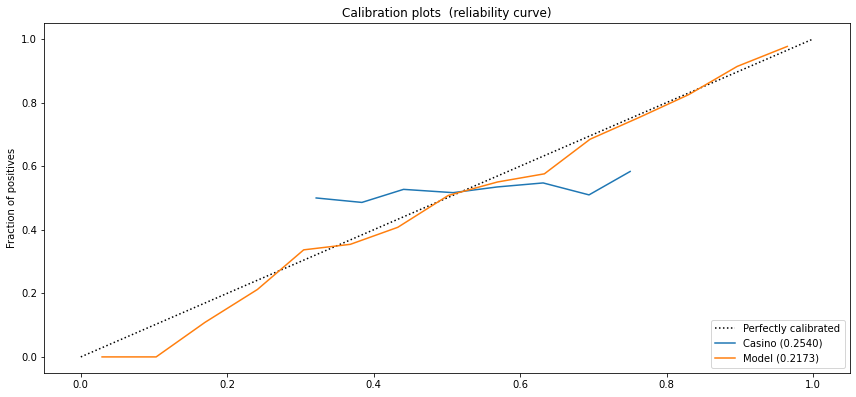

In [162]:
def cal_curve(data, bins):
    
    fig = plt.figure(1, figsize=(12, 8))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
#     ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    for y_test, y_pred, y_proba, name in data:
        brier = brier_score_loss(y_test, y_proba)
        print("{}\t\tAccuracy:{:.4f}\t Brier Loss: {:.4f}".format(
            name, accuracy_score(y_test, y_pred), brier))
        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, y_proba, n_bins=bins)
        ax1.plot(mean_predicted_value, fraction_of_positives,
                 label="%s (%1.4f)" % (name, brier))
#         ax2.hist(y_proba, range=(0, 1), bins=bins, label=name,
#                  histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

#     ax2.set_xlabel("Mean predicted value")
#     ax2.set_ylabel("Count")
#     ax2.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


hist_preds = hist_class1.predict(X_test)
hist_proba = hist_class1.predict_proba(X_test)[:,1]

casino_proba = prob[:3898]
casino_preds = prediction[:3898]

data = [
    (y_test, casino_preds, casino_proba, 'Casino'),
    (y_test,hist_preds, hist_proba, 'Model')
]
cal_curve(data, 15)

In [156]:
hist_preds

array([1, 1, 0, ..., 1, 1, 0])